# Initial Thoughts on Tesco Data Set:

## Potential pitfalls:
* Data set is only for one year, so we cannot do a pairing of average income for given location for each year versus how much of what you bought on average for that year. 
* The data is only for tesco club card users and hence that might intriduce some sort of bias. 
* The data is for purchases and not consumption, so the way you look at the data needs to be very specific to that.

## Description of Data:

The data is comprised of an area_id to identify location. Each row also has the weight, volume, calories and caloric density of the average product. Furthermore, we have variables to descripe the nutrients in the average purchase/product. We have a variable for the weight, energy,fraction of energy from, diversity of weight and diversity of calories for each nutrient in the average purchase. Furthermore, we have variables that describe the proportion of a food category such as the proportion of a product category in the average purchase as well as by weight. We also have a variable for the diversity of food product categories in the average purchase as well as by weight. Lastly, we have some variables to describe the demographics of a particular area_id such as population and gender splits etc. The data also has extra normalizing variables and percintile variables where appropriate. The main nutrients are fats, carbohydrates and proteins but some interesting subgroups such as transfats are included as well. A broad group of food categories is taken into account such as poultry and wine for example. 

# Pre processing of Data:

In [1]:
import pandas as pd #Pandas for dataframe manipulation
from datetime import datetime as dt #datetime for working with dates
import os #Package to be able to access file paths
import numpy as np
import matplotlib.pyplot as plt

path_base = "/Users/luisweekes/Documents/Applied_DS/Tesco/7796666" #Where files are stored 

full_data_names = os.listdir(path_base) #list of all files

borough_files = [ file for file in full_data_names if 'borough' in file] #extract files that only relate to borough.

borough_files.remove('year_borough_grocery.csv')
print(borough_files)

file_paths_borough = [os.path.join(path_base,file) for file in borough_files] #join base of path to each file name
print(file_paths_borough)

borough_dfs = []

for file_path in file_paths_borough: 
    mon = file_path[53:56] #exract the month associated with each file
    df = pd.read_csv(file_path,encoding='utf-8',encoding_errors='replace') #read in csv to df 
    df['Month'] = dt.strptime(mon, '%b').month #create column for dates for future use
    borough_dfs.append(df) #append df to list



borough_tesco_data = pd.concat(borough_dfs, axis=0, ignore_index = True) # concat list of dfs into one big df.
for col in borough_tesco_data.columns:
    print(col)


['Mar_borough_grocery.csv', 'Apr_borough_grocery.csv', 'May_borough_grocery.csv', 'Aug_borough_grocery.csv', 'Jul_borough_grocery.csv', 'Jun_borough_grocery.csv', 'Oct_borough_grocery.csv', 'Sep_borough_grocery.csv', 'Jan_borough_grocery.csv', 'Feb_borough_grocery.csv', 'Dec_borough_grocery.csv', 'Nov_borough_grocery.csv']
['/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/Mar_borough_grocery.csv', '/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/Apr_borough_grocery.csv', '/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/May_borough_grocery.csv', '/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/Aug_borough_grocery.csv', '/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/Jul_borough_grocery.csv', '/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/Jun_borough_grocery.csv', '/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/Oct_borough_grocery.csv', '/Users/luisweekes/Documents/Applied_DS/Tesco/7796666/Sep_borough_grocery.csv', '/Users/luisweekes/Documents/Appli

In [2]:
#adding borough names to tesco data in order to join with data later.
london_boroughs = {
    'E09000001': 'City of London',
    'E09000002': 'Barking and Dagenham',
    'E09000003': 'Barnet',
    'E09000004': 'Bexley',
    'E09000005': 'Brent',
    'E09000006': 'Bromley',
    'E09000007': 'Camden',
    'E09000008': 'Croydon',
    'E09000009': 'Ealing',
    'E09000010': 'Enfield',
    'E09000011': 'Greenwich',
    'E09000012': 'Hackney',
    'E09000013': 'Hammersmith and Fulham',
    'E09000014': 'Haringey',
    'E09000015': 'Harrow',
    'E09000016': 'Havering',
    'E09000017': 'Hillingdon',
    'E09000018': 'Hounslow',
    'E09000019': 'Islington',
    'E09000020': 'Kensington and Chelsea',
    'E09000021': 'Kingston upon Thames',
    'E09000022': 'Lambeth',
    'E09000023': 'Lewisham',
    'E09000024': 'Merton',
    'E09000025': 'Newham',
    'E09000026': 'Redbridge',
    'E09000027': 'Richmond upon Thames',
    'E09000028': 'Southwark',
    'E09000029': 'Sutton',
    'E09000030': 'Tower Hamlets',
    'E09000031': 'Waltham Forest',
    'E09000032': 'Wandsworth',
    'E09000033': 'Westminster'
}

borough_tesco_data['Borough_name'] = borough_tesco_data['area_id'].apply(lambda x: london_boroughs[x])


In [3]:
#print('List of cloumns in df: ') #check all available columns 
#for col in borough_tesco_data.columns:
#   print(col)

# extract columns that you will be working with
borough_tesco_data = borough_tesco_data[['area_id','Borough_name','weight','volume','fat','saturate','salt','sugar',
                                         'protein','carb','fibre','alcohol','energy_fat','energy_saturate'
                                         ,'energy_sugar','energy_protein','energy_carb','energy_fibre','energy_alcohol','energy_tot',
                                         'f_energy_fat', 'f_energy_saturate', 'f_energy_sugar', 'f_energy_protein', 'f_energy_carb', 
                                          'f_energy_fibre', 'f_energy_alcohol', 'f_wine',
                                         'f_readymade','energy_density','Month']]

In [4]:
for col in borough_tesco_data.columns:
    print(col)

print(borough_tesco_data)

area_id
Borough_name
weight
volume
fat
saturate
salt
sugar
protein
carb
fibre
alcohol
energy_fat
energy_saturate
energy_sugar
energy_protein
energy_carb
energy_fibre
energy_alcohol
energy_tot
f_energy_fat
f_energy_saturate
f_energy_sugar
f_energy_protein
f_energy_carb
f_energy_fibre
f_energy_alcohol
f_wine
f_readymade
energy_density
Month
       area_id          Borough_name      weight      volume       fat  \
0    E09000001        City of London  322.803251   99.690594  8.541666   
1    E09000002  Barking and Dagenham  409.963009  122.566371  9.335778   
2    E09000003                Barnet  399.897395  115.248652  8.676295   
3    E09000004                Bexley  344.310034  107.837728  9.379678   
4    E09000005                 Brent  422.776304  129.445377  8.983734   
..         ...                   ...         ...         ...       ...   
391  E09000029                Sutton  306.087134  102.326321  9.732674   
392  E09000030         Tower Hamlets  399.978802  116.806064  9.288

# Total energy (broken down) in each purchase on average for all of london is statistically different for each month: 

* We can see that there is probably a seasonal effect to the average calories in a purchase from tesco. Or maybe there might be some sort of income effect as well.
* The differences between the average calories on the average purchase by macro are all statiscically significant. The average proportion of calories from the different months are statistically different as well.
* There might be an effect due to a change in income, but as mentioned earlier in this document, we might not be able to confirm this without more years of tesco data.


   Month  energy_tot  energy_fat  energy_saturate  energy_sugar  \
0    Jan  175.701273   76.900248        30.224067     38.975972   
1    Feb  180.456826   80.396911        31.894493     41.347242   
2    Mar  181.430641   81.945319        32.643657     42.636730   
3    Apr  178.542543   81.443131        31.925727     40.024658   
4    May  175.932210   79.681093        30.860272     38.872237   
5    Jun  171.431177   77.089262        30.021894     38.465440   
6    Jul  172.235433   77.361954        29.977573     38.064218   
7    Aug  173.936712   78.561951        30.586838     38.436504   
8    Sep  178.837515   80.911042        31.901056     39.731207   
9    Oct  180.455278   81.337781        32.119870     40.798035   
10   Nov  183.257232   83.747101        33.344058     41.451341   
11   Dec  190.051974   89.073923        35.622235     42.080366   

    energy_protein  energy_carb  energy_fibre  energy_alcohol  
0        21.707289    72.636884      3.151020        1.305832  


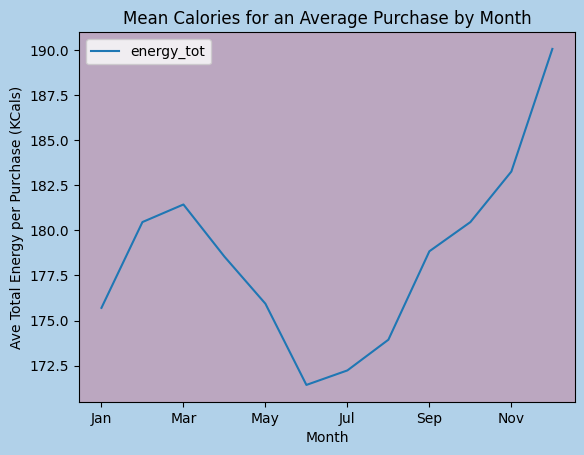

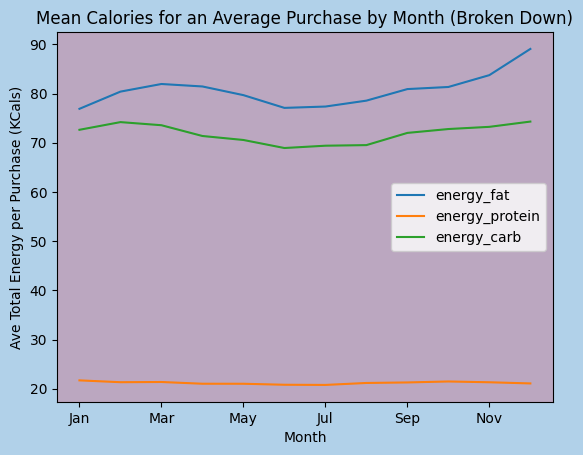

In [5]:
months = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
              'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

################################## Mean calories per purchase by month###################

Mean_Calories_per_purchase_by_month = borough_tesco_data.groupby('Month')[['energy_tot','energy_fat','energy_saturate','energy_sugar', 'energy_protein', 'energy_carb', 'energy_fibre', 'energy_alcohol']].mean()
Mean_Calories_per_purchase_by_month = Mean_Calories_per_purchase_by_month.reset_index()
Mean_Calories_per_purchase_by_month['Month'] = Mean_Calories_per_purchase_by_month['Month'].apply(lambda x: months[x])
print(Mean_Calories_per_purchase_by_month)


Mean_Calories_per_purchase_by_month.plot(x = 'Month',y = 'energy_tot')
plt.xlabel('Month')
plt.ylabel('Ave Total Energy per Purchase (KCals)')
plt.title('Mean Calories for an Average Purchase by Month')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.show()

Mean_Calories_per_purchase_by_month.plot(x = 'Month',y = ['energy_fat', 'energy_protein', 'energy_carb'])
plt.xlabel('Month')
plt.ylabel('Ave Total Energy per Purchase (KCals)')
plt.title('Mean Calories for an Average Purchase by Month (Broken Down)')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.show()

## Below is a figure to show the proportion of total calories purchased from different nutrient types for each month on avaerage:

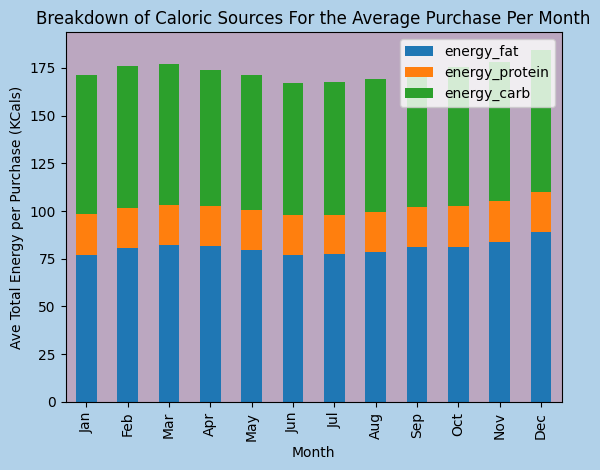

In [6]:


# Assuming Mean_Calories_per_purchase_by_month is your DataFrame containing the data
Mean_Calories_per_purchase_by_month.plot(x='Month', y=['energy_fat', 'energy_protein', 'energy_carb'], kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Ave Total Energy per Purchase (KCals)')
plt.title('Breakdown of Caloric Sources For the Average Purchase Per Month')

plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.show()


In [7]:
# Confirming that there are statistical differences between the average energy coming from the different macros by month.
import statsmodels.api as sm
from statsmodels.formula.api import ols

borough_tesco_data['Month'] = pd.Categorical(borough_tesco_data['Month'])

model_fat = ols('energy_fat ~ Month', data=borough_tesco_data).fit()
anova_table_fat = sm.stats.anova_lm(model_fat, typ=2) 
print(anova_table_fat)

model_carb = ols('energy_carb ~ Month', data=borough_tesco_data).fit()
anova_table_carb = sm.stats.anova_lm(model_carb, typ=2) 
print(anova_table_carb)

model_protein = ols('energy_protein ~ Month', data=borough_tesco_data).fit()
anova_table_protein = sm.stats.anova_lm(model_protein, typ=2) 
print(anova_table_protein)



               sum_sq     df          F        PR(>F)
Month     4167.271498   11.0  70.716621  3.055451e-85
Residual  2057.163621  384.0        NaN           NaN
               sum_sq     df         F        PR(>F)
Month     1310.737502   11.0  4.962219  3.184855e-07
Residual  9221.006338  384.0       NaN           NaN
              sum_sq     df         F        PR(>F)
Month      26.647644   11.0  8.607387  1.206521e-13
Residual  108.075191  384.0       NaN           NaN


            sum_sq     df          F        PR(>F)
Month     0.019135   11.0  24.150654  1.016505e-37
Residual  0.027659  384.0        NaN           NaN


<Figure size 800x600 with 0 Axes>

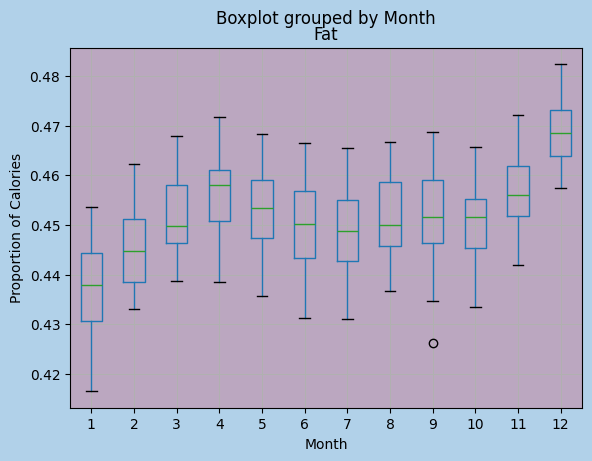

            sum_sq     df         F        PR(>F)
Month     0.011908   11.0  5.256342  9.640082e-08
Residual  0.079086  384.0       NaN           NaN
            sum_sq     df         F        PR(>F)
Month     0.003674   11.0  10.59667  4.626200e-17
Residual  0.012103  384.0       NaN           NaN


Text(0.5, 1.0, 'Protein')

<Figure size 800x600 with 0 Axes>

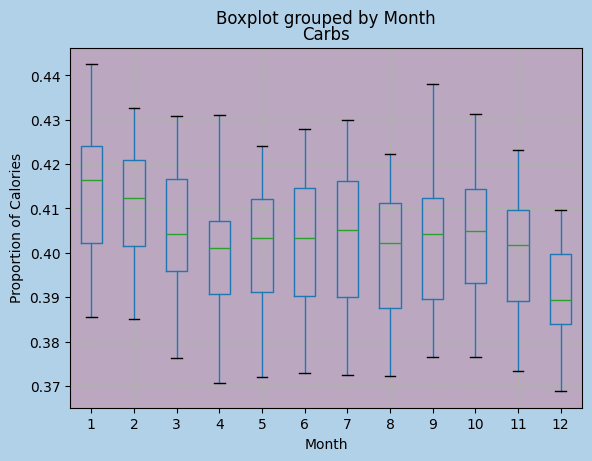

<Figure size 800x600 with 0 Axes>

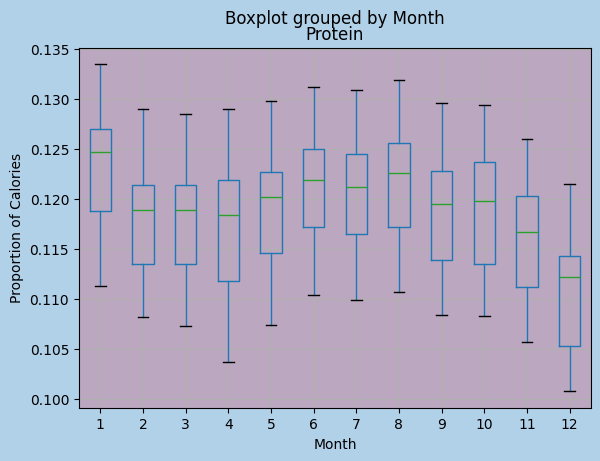

In [8]:
# Confirming that there are statistical differences between the average proportion of energy coming from the different macros by month.

model_fat = ols('f_energy_fat ~ Month', data=borough_tesco_data).fit()
anova_table_fat = sm.stats.anova_lm(model_fat, typ=2) 
print(anova_table_fat)

# Create the box plot
plt.figure(figsize=(8, 6))
borough_tesco_data.boxplot(column='f_energy_fat', by='Month')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.ylabel('Proportion of Calories')
plt.title('Fat')
plt.show()

model_carb = ols('f_energy_carb ~ Month', data=borough_tesco_data).fit()
anova_table_carb = sm.stats.anova_lm(model_carb, typ=2) 
print(anova_table_carb)

# Create the box plot
plt.figure(figsize=(8, 6))
borough_tesco_data.boxplot(column='f_energy_carb', by='Month')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.ylabel('Proportion of Calories')
plt.title('Carbs')


model_protein = ols('f_energy_protein ~ Month', data=borough_tesco_data).fit()
anova_table_protein = sm.stats.anova_lm(model_protein, typ=2) 
print(anova_table_protein)

# Create the box plot
plt.figure(figsize=(8, 6))
borough_tesco_data.boxplot(column='f_energy_protein', by='Month')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.ylabel('Proportion of Calories')
plt.title('Protein')



In [9]:
#confirming that sugar is a part of carbs and saturated is a part of fats in the data set. 
specified_columns = ['f_energy_carb','f_energy_fat','f_energy_protein','f_energy_alcohol','f_energy_fibre']
row_sums = borough_tesco_data[specified_columns].sum(axis=1)
print(row_sums)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
391    1.0
392    1.0
393    1.0
394    1.0
395    1.0
Length: 396, dtype: float64


# There is a change in the proportion  of certain goods per purchase for all of london from month to month.

This is evidence of Inferior and normal goods, bc people are more likely to want to spend their money during christmas which mirrors an income effect.

__Normal__ goods are those of which demand increases when income increases. 

__Inferior__ goods are those of which demand goes down for when income increases.

An __Income Effect__ is how you change you preferences in terms of spending your money after an increase or decrease in Income.
If you have a positive income adjustment, and you decide to purchase more of a particular good, that is a normal good. 
Opposite for Inferior.

__citations for Income effect, Normal, Inferior Goods:__

* Krugman, P. and Wells, R., 2008. Microeconomics. Macmillan.

I will be looking at the proportion of wine bought in the average purchase by month as an example of a Normal good.
I will be looking at the proportion of readymade meals bought in the average purchase by month as an example of an inferior good.

* Average proportion of wine in an average purchase does change from month to month. This could be due to a seasonal effect or an income effect. Statistically significant with an F score of: 11.213801. The average proportion of wine in the average purchase is significantly higher in Dec. 

* Average proportion of ready-made meals in an average purchase does change from month to month, but it is not Statistically significant with an F score of: 1.241391. I therefore conducted a t-test to see if the biggest change from month to month (Nov-Dec) is statistically significant, unfortunately we get a p-value of .13 which does not satisfy my confidence level of 95%. I went even further to look at the effect size between november and december and that is also not particularly large either. Therefore, eventhought the raw numbers indicate that ready made meals might be an inferiors goods in that theres a larger propensity to spend in december, we can not confidently say that the diffence is statistically sound or even that big of a difference in the first place.




   Month    f_wine
0    Jan  0.014208
1    Feb  0.016144
2    Mar  0.015651
3    Apr  0.017979
4    May  0.016074
5    Jun  0.015345
6    Jul  0.016134
7    Aug  0.016093
8    Sep  0.015613
9    Oct  0.017211
10   Nov  0.018193
11   Dec  0.024628


/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_97978/4152936468.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Prop_wine_by_month_mean = Prop_wine.groupby('Month')['f_wine'].mean()


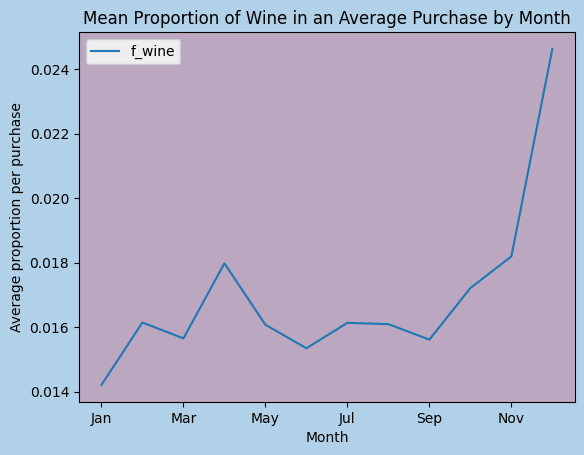

            sum_sq     df          F        PR(>F)
Month     0.002574   11.0  11.213801  4.211005e-18
Residual  0.008014  384.0        NaN           NaN


In [10]:
#Analysis of changes in proportion of wine in purchases from month to month in Borough. (potential normal good)

Prop_wine= borough_tesco_data[['Month','f_wine']]
Prop_wine_by_month_mean = Prop_wine.groupby('Month')['f_wine'].mean()
Prop_wine_by_month_mean= Prop_wine_by_month_mean.reset_index()
Prop_wine_by_month_mean['Month'] = Prop_wine_by_month_mean['Month'].apply(lambda x: months[x])
print(Prop_wine_by_month_mean)

Prop_wine_by_month_mean.plot(x = 'Month',y = 'f_wine')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.xlabel('Month')
plt.ylabel('Average proportion per purchase')
plt.title('Mean Proportion of Wine in an Average Purchase by Month')
plt.show()

model_wine = ols('f_wine ~ Month', data=borough_tesco_data).fit()
anova_table_wine = sm.stats.anova_lm(model_wine, typ=2) 
print(anova_table_wine)

   Month  f_readymade
0    Jan     0.063592
1    Feb     0.060425
2    Mar     0.059461
3    Apr     0.057154
4    May     0.056305
5    Jun     0.058530
6    Jul     0.058373
7    Aug     0.059871
8    Sep     0.060566
9    Oct     0.063883
10   Nov     0.062533
11   Dec     0.057343


/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_97978/2689588523.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Prop_ready_by_month_mean = Prop_ready.groupby('Month')['f_readymade'].mean()


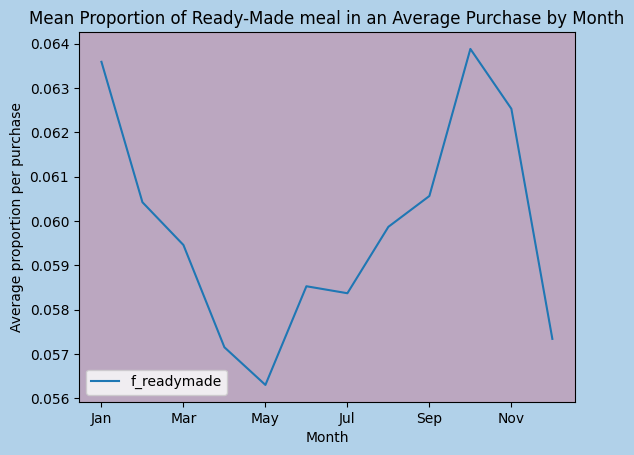

            sum_sq     df         F    PR(>F)
Month     0.002260   11.0  1.241391  0.257441
Residual  0.063564  384.0       NaN       NaN
t-statistic: 1.520346705632933
p-value: 0.1333492396973758
effect size: 0.37428348560374874


In [11]:
#Analysis of changes in proportion of readymade meals in purchases from month to month in Borough. (potential inferior good)

Prop_ready= borough_tesco_data[['Month','f_readymade']]
Prop_ready_by_month_mean = Prop_ready.groupby('Month')['f_readymade'].mean()
Prop_ready_by_month_mean= Prop_ready_by_month_mean.reset_index()
Prop_ready_by_month_mean['Month'] = Prop_ready_by_month_mean['Month'].apply(lambda x: months[x])
print(Prop_ready_by_month_mean)

Prop_ready_by_month_mean.plot(x = 'Month',y = 'f_readymade')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.xlabel('Month')
plt.ylabel('Average proportion per purchase')
plt.title('Mean Proportion of Ready-Made meal in an Average Purchase by Month')
plt.show()

model_readymade = ols('f_readymade ~ Month', data=borough_tesco_data).fit()
anova_table_readymade = sm.stats.anova_lm(model_readymade, typ=2) 
print(anova_table_readymade)
#overall ANOVA inconclusive, but we can use a t-test to look at the difference between NOV and DEC

from scipy.stats import ttest_ind

nov_ready = borough_tesco_data.loc[borough_tesco_data['Month'] == 11, 'f_readymade']
dec_ready = borough_tesco_data.loc[borough_tesco_data['Month'] == 12, 'f_readymade']

# Perform the t-test
t_stat, p_val = ttest_ind(nov_ready, dec_ready)

# Calculate the effect size (Cohen's d)
n1 = len(nov_ready)
n2 = len(dec_ready)
df = n1 + n2 - 2  # degrees of freedom

# Calculate the pooled standard deviation
s1 = nov_ready.std()
s2 = dec_ready.std()
s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df)

# Calculate Cohen's d
d = (nov_ready.mean() - dec_ready.mean()) / s_pooled

# Print the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")
print(f"effect size: {d}")


# Analysis of Income For all of London by borough:

### source: https://data.london.gov.uk/dataset/earnings-place-residence-borough

#### Description: 
This data is taken from the Office of National Statistics. It gives us the gross median weekly earnings for each Borough from 2002 to 2022. 

In [12]:
#Preprocessing and cleaning of Income Data by Borough

#taken from : 
Income_Data_by_Borough = pd.read_csv("/Users/luisweekes/Documents/Applied_DS/Tesco/earnings-residence-borough.csv",encoding='utf-8',encoding_errors='replace') #read in csv to df 

years = list(range(2002, 2023))
string_years_area = [str(num) for num in years]

string_years_area.insert(0,'Area')

Income_Data_by_Borough = Income_Data_by_Borough[string_years_area]

Income_Data_by_Borough = Income_Data_by_Borough.drop(Income_Data_by_Borough.index[:3]).reset_index(drop=True)

selected_rows = list(range(0, 32))

Income_Data_by_Borough = Income_Data_by_Borough.loc[selected_rows,string_years_area]

years = list(range(2002, 2023))
string_years = [str(num) for num in years]

Income_Data_by_Borough[string_years] = Income_Data_by_Borough[string_years].astype(float)

print(Income_Data_by_Borough)




                      Area   2002   2003   2004   2005   2006   2007   2008  \
0     Barking and Dagenham  383.3  354.9  360.1  375.1  417.6  446.7  449.9   
1                   Barnet  427.4  450.1  453.3  442.3  466.1  460.0  502.2   
2                   Bexley  405.0  431.9  438.1  452.4  443.4  469.8  483.9   
3                    Brent  368.4  359.8  395.5  394.7  398.7  421.6  437.0   
4                  Bromley  440.1  449.2  461.2  464.8  479.5  506.3  546.0   
5                   Camden  470.8  491.1  507.9  541.0  552.2  592.6  614.6   
6                  Croydon  405.3  406.4  413.3  421.0  441.6  454.0  481.6   
7                   Ealing  431.5  448.5  444.2  437.8  452.0  465.3  504.1   
8                  Enfield  363.1  377.1  386.0  408.1  409.6  448.7  424.9   
9                Greenwich  401.3  430.4  441.8  405.0  456.3  456.2  480.8   
10                 Hackney  387.1  395.2  411.1  432.1  428.8  451.1  472.6   
11  Hammersmith and Fulham  492.8  498.3  512.0  490

# Below is line plot of Average weekly Pay for all of London and the 3 highest and lowest weekly earning Boroughs in 2015 

* We will be comparing nominal median weekly Incomes which should be fine because all of the weekly incomes would be experiencing the same level of inflation.
* The rate of nominal increase seems to be around the same for top three and bottom three weekly earning boroughs in London for 2015.

float64
Top three in 2015:  25    Richmond upon Thames
30              Wandsworth
31             Westminster
Name: Area, dtype: object
Bottom three in 2015:  0     Barking and Dagenham
3                    Brent
23                  Newham
Name: Area, dtype: object
2002    383.3
2003    354.9
2004    360.1
2005    375.1
2006    417.6
2007    446.7
2008    449.9
2009    448.8
2010    429.3
2011    452.1
2012    450.0
2013    441.2
2014    422.5
2015    436.6
2016    462.2
2017    461.0
2018    479.1
2019    471.0
2020    486.7
2021    508.7
2022    536.1
Name: 0, dtype: object


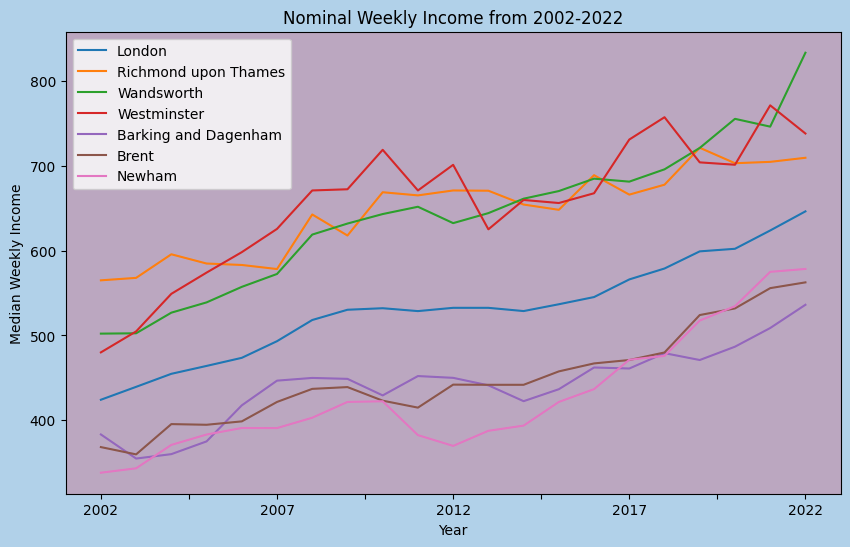

In [13]:
years = list(range(2002, 2023))
print(Income_Data_by_Borough['2002'].dtype)
string_years = [str(num) for num in years]
mean_weekly_pay_for_all_london_02_22 = Income_Data_by_Borough[string_years].mean()
#print(mean_weekly_pay_for_all_london_02_22)


Income_Data_by_Borough.loc[32] = mean_weekly_pay_for_all_london_02_22
Income_Data_by_Borough.loc[32,'Area'] = 'Mean'

#print(Income_Data_by_Borough)

#Line plot of weekly Income for the average of all of London, and the 3 highest and lowest weekly earning Boroughs in 2015. 

# Find the top three boroughs in terms of weekly income in 2015
top_three_values = Income_Data_by_Borough['2015'].nlargest(3)
top_three_rows = Income_Data_by_Borough[Income_Data_by_Borough['2015'].isin(top_three_values)]

Top_three_boroughs = top_three_rows['Area']

print('Top three in 2015: ',Top_three_boroughs)
#Top three in 2015:  25    Richmond upon Thames
#30              Wandsworth
#31             Westminster

# Find the low three boroughs in terms of weekly income in 2015
bot_three_values = Income_Data_by_Borough['2015'].nsmallest(3)
bot_three_rows = Income_Data_by_Borough[Income_Data_by_Borough['2015'].isin(bot_three_values)]

bot_three_boroughs = bot_three_rows['Area']

print('Bottom three in 2015: ',bot_three_boroughs)

#Bottom three in 2015:  0     Barking and Dagenham
#3                    Brent
#23                  Newham

Mean_weekly_pay_London_02_22 = Income_Data_by_Borough.loc[32,string_years]
Mean_weekly_pay_Richmond_02_22 = Income_Data_by_Borough.loc[25,string_years]
Mean_weekly_pay_Wandsworth_02_22 = Income_Data_by_Borough.loc[30,string_years]
Mean_weekly_pay_Westminster_02_22 = Income_Data_by_Borough.loc[31,string_years]
Mean_weekly_pay_Barking_02_22 = Income_Data_by_Borough.loc[0,string_years]
Mean_weekly_pay_Brent_02_22 = Income_Data_by_Borough.loc[3,string_years]
Mean_weekly_pay_Newham_02_22 = Income_Data_by_Borough.loc[23,string_years]

print(Mean_weekly_pay_Barking_02_22)

Mean_weekly_pay_London_02_22.plot(figsize=(10, 6), title='Nominal Weekly Income from 2002-2022', label = 'London')
Mean_weekly_pay_Richmond_02_22.plot(figsize=(10, 6), title='Nominal Weekly Income from 2002-2022', label = 'Richmond upon Thames')
Mean_weekly_pay_Wandsworth_02_22.plot(figsize=(10, 6), title='Nominal Weekly Income from 2002-2022', label = 'Wandsworth')
Mean_weekly_pay_Westminster_02_22.plot(figsize=(10, 6), title='Nominal Weekly Income from 2002-2022', label = 'Westminster')
Mean_weekly_pay_Barking_02_22.plot(figsize=(10, 6), title='Nominal Weekly Income from 2002-2022', label = 'Barking and Dagenham')
Mean_weekly_pay_Brent_02_22.plot(figsize=(10, 6), title='Nominal Weekly Income from 2002-2022', label = 'Brent')
Mean_weekly_pay_Newham_02_22.plot(figsize=(10, 6), title='Nominal Weekly Income from 2002-2022', label = 'Newham')


plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.legend()
plt.xlabel('Year')
plt.ylabel('Median Weekly Income')
plt.show()



# Exploring Whether There is an Income Effect on Particular Goods and Macro Nutrients :


I hypothesize that high income communities will probably have a higher proportion of their calories purchased coming from protein and fat whereas in lower income communties the proportion of calories purchase will come from carbs. (Xu et al.)

Similarly, I propose that higher income communities will on average have higher proportions of wine in their purchases and potentiall lower proportions of ready-made meals in their purchases. 

Citation: Xu, Y., Zhu, S., Zhou, Y., Pramono, A. and Zhou, Z., 2020. Changing income-related
inequality in daily nutrients intake: A longitudinal analysis from china. International journal
of environmental research and public health, 17(20), p.7627.

__Outcomes:__

* scatter plots bolster hyothesis that as Income rises so does the proportion of calories from Fats and proteins purchased increases whereas the proportion of calories from carbs purchased decreases as Income rises. 

* scatter plot bolsters claim that wine is a normal good.

* scatter plot more or less confirms previous figures in that income does not have an effect on ready made meals.

* To further bolster our claims from the scatter plots, I regressed Icome over the appropriate proportion variables. 


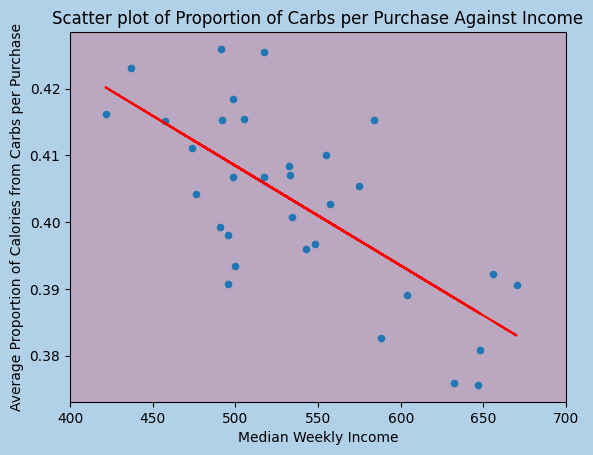

                            OLS Regression Results                            
Dep. Variable:          f_energy_carb   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     29.33
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           7.21e-06
Time:                        13:25:14   Log-Likelihood:                 103.12
No. Observations:                  32   AIC:                            -202.2
Df Residuals:                      30   BIC:                            -199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4832      0.015     32.377      0.0

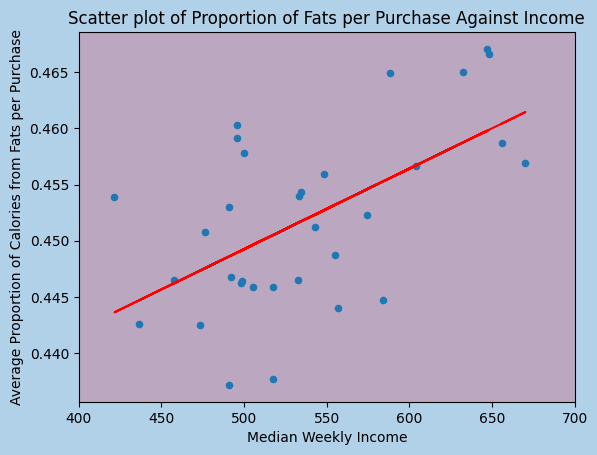

                            OLS Regression Results                            
Dep. Variable:           f_energy_fat   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     14.95
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           0.000550
Time:                        13:25:14   Log-Likelihood:                 115.85
No. Observations:                  32   AIC:                            -227.7
Df Residuals:                      30   BIC:                            -224.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4134      0.010     41.221      0.0

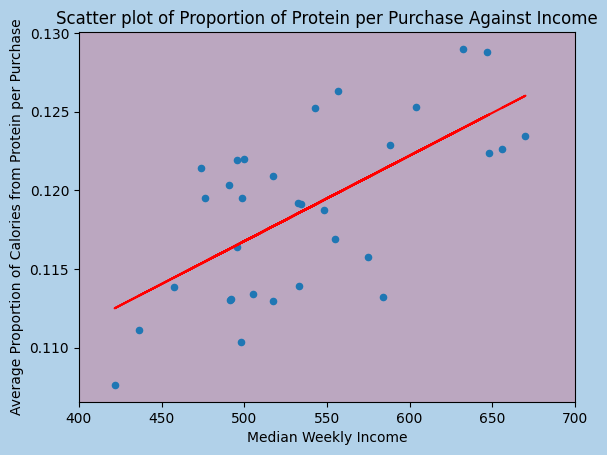

                            OLS Regression Results                            
Dep. Variable:       f_energy_protein   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     21.26
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           6.98e-05
Time:                        13:25:14   Log-Likelihood:                 130.36
No. Observations:                  32   AIC:                            -256.7
Df Residuals:                      30   BIC:                            -253.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0896      0.006     14.062      0.0

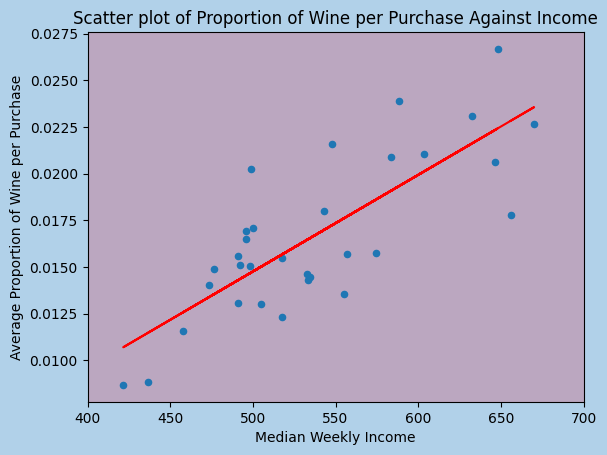

                            OLS Regression Results                            
Dep. Variable:                 f_wine   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     48.82
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           9.19e-08
Time:                        13:25:14   Log-Likelihood:                 145.23
No. Observations:                  32   AIC:                            -286.5
Df Residuals:                      30   BIC:                            -283.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0111      0.004     -2.779      0.0

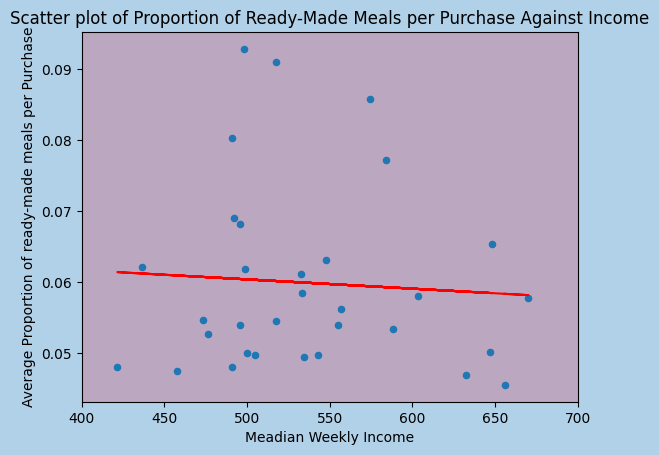

                            OLS Regression Results                            
Dep. Variable:            f_readymade   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.1278
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.723
Time:                        13:25:14   Log-Likelihood:                 94.207
No. Observations:                  32   AIC:                            -184.4
Df Residuals:                      30   BIC:                            -181.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0669      0.020      3.393      0.0

In [14]:
Incomes_2015 = Income_Data_by_Borough[['Area','2015']]
#print(Incomes_2015)

Mean_props_borough = borough_tesco_data.groupby('Borough_name')[['f_energy_carb','f_energy_fat','f_energy_protein','f_wine','f_readymade']].mean()

#print(Mean_props_borough)

Incomes_Mean_Props_Borough = pd.merge(Incomes_2015, Mean_props_borough, left_on='Area', right_on='Borough_name', how='inner')

#print(Incomes_Mean_Props_Borough)

############### Carbs 
X_with_const = sm.add_constant(Incomes_Mean_Props_Borough['2015'])

# Create a linear regression model
model_carb = sm.OLS(Incomes_Mean_Props_Borough['f_energy_carb'], X_with_const)

# Fit the model to the data
results_carb = model_carb.fit()

# Predictions
y_pred_carb = results_carb.predict(X_with_const)


Incomes_Mean_Props_Borough.plot.scatter(x = '2015', y = 'f_energy_carb')
plt.plot(X_with_const, y_pred_carb, color='red')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.xlim(400,700)
plt.xlabel('Median Weekly Income')
plt.ylabel('Average Proportion of Calories from Carbs per Purchase')
plt.title('Scatter plot of Proportion of Carbs per Purchase Against Income')
plt.show()

print(results_carb.summary())

########################### fat

# Create a linear regression model
model_fat = sm.OLS(Incomes_Mean_Props_Borough['f_energy_fat'], X_with_const)

# Fit the model to the data
results_fat = model_fat.fit()

# Predictions
y_pred_fat = results_fat.predict(X_with_const)
Incomes_Mean_Props_Borough.plot.scatter(x = '2015', y = 'f_energy_fat')
plt.plot(X_with_const, y_pred_fat, color='red')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.xlim(400,700)
plt.xlabel('Median Weekly Income')
plt.ylabel('Average Proportion of Calories from Fats per Purchase')
plt.title('Scatter plot of Proportion of Fats per Purchase Against Income')
plt.show()

print(results_fat.summary())

######################## protein 

# Create a linear regression model
model_prot = sm.OLS(Incomes_Mean_Props_Borough['f_energy_protein'], X_with_const)

# Fit the model to the data
results_prot = model_prot.fit()

# Predictions
y_pred_prot = results_prot.predict(X_with_const)

Incomes_Mean_Props_Borough.plot.scatter(x = '2015', y = 'f_energy_protein')
plt.plot(X_with_const, y_pred_prot, color='red')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.xlim(400,700)
plt.xlabel('Median Weekly Income')
plt.ylabel('Average Proportion of Calories from Protein per Purchase')
plt.title('Scatter plot of Proportion of Protein per Purchase Against Income')
plt.show()

print(results_prot.summary())
####################### wine 

# Create a linear regression model
model_wine_reg = sm.OLS(Incomes_Mean_Props_Borough['f_wine'], X_with_const)

# Fit the model to the data
results_wine_reg = model_wine_reg.fit()

# Predictions
y_pred_wine = results_wine_reg.predict(X_with_const)

Incomes_Mean_Props_Borough.plot.scatter(x = '2015', y = 'f_wine')
plt.plot(X_with_const, y_pred_wine, color='red')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.xlim(400,700)
plt.xlabel('Median Weekly Income')
plt.ylabel('Average Proportion of Wine per Purchase')
plt.title('Scatter plot of Proportion of Wine per Purchase Against Income')
plt.show()

print(results_wine_reg.summary())

###################### ready made

# Create a linear regression model
model_ready = sm.OLS(Incomes_Mean_Props_Borough['f_readymade'], X_with_const)

# Fit the model to the data
results_ready = model_ready.fit()

# Predictions
y_pred_ready = results_ready.predict(X_with_const)

Incomes_Mean_Props_Borough.plot.scatter(x = '2015', y = 'f_readymade')
plt.plot(X_with_const, y_pred_ready, color='red')
plt.gcf().set_facecolor((0, 103/255, 184/255, .3))
plt.gca().set_facecolor((227/255, 0, 28/255, 0.2)) 
plt.xlim(400,700)
plt.xlabel('Meadian Weekly Income')
plt.ylabel('Average Proportion of ready-made meals per Purchase')
plt.title('Scatter plot of Proportion of Ready-Made Meals per Purchase Against Income')
plt.show()

print(results_ready.summary())